In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)    
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import numpy as np

### 1) Business Understanding

what are the questions you are interested in tackling.<br>

- Average and range of price for a day, week, month and year for the city
- Average price and range of price for weekdays and weekends
- Occupancy ration

a) What is the monthly average price/night for the city?<br>
b) What is the average price Monday to Sunday?<br>
c) What is the monthly occupancy ratio for the city?<br>
d) What is the average price/night per neighbourhood?<br>
e) What is the occupancy ratio per neighbourhood?<br>

What are we asking - is the price set correctly to maximize return?<br>

In [2]:
#read listing.csv, and its shape
listing_seattle = pd.read_csv('listings_seattle.csv')
print('Shape of listing csv is',listing_seattle.shape)

Shape of listing csv is (3818, 92)


In [3]:
#data overview
listing_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
listing_seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
#what are the columns
listing_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleanin

In [6]:
#are the ids unique for each row?
len(listing_seattle['id'].unique()) == len(listing_seattle)

True

In [7]:
#find number of hosts and listings
listing_count = len(listing_seattle['id'].unique())        #listing_seattle['id'].count() cnn also be used as each row contains information about unique listing
host_count = len(listing_seattle['host_id'].unique())
print(f'"listing_seattle.csv" contains information about {listing_count} listings(properties), hosted by {host_count} hosts')

"listing_seattle.csv" contains information about 3818 listings(properties), hosted by 2751 hosts


In [8]:
#number of missing values in each column
listing_seattle_missing = listing_seattle.isnull().sum()
listing_seattle_missing.sort_values(ascending=False)
#license column is not of any use, we can discard it!

license             3818
square_feet         3721
monthly_price       2301
security_deposit    1952
weekly_price        1809
                    ... 
accommodates           0
bed_type               0
amenities              0
price                  0
id                     0
Length: 92, dtype: int64

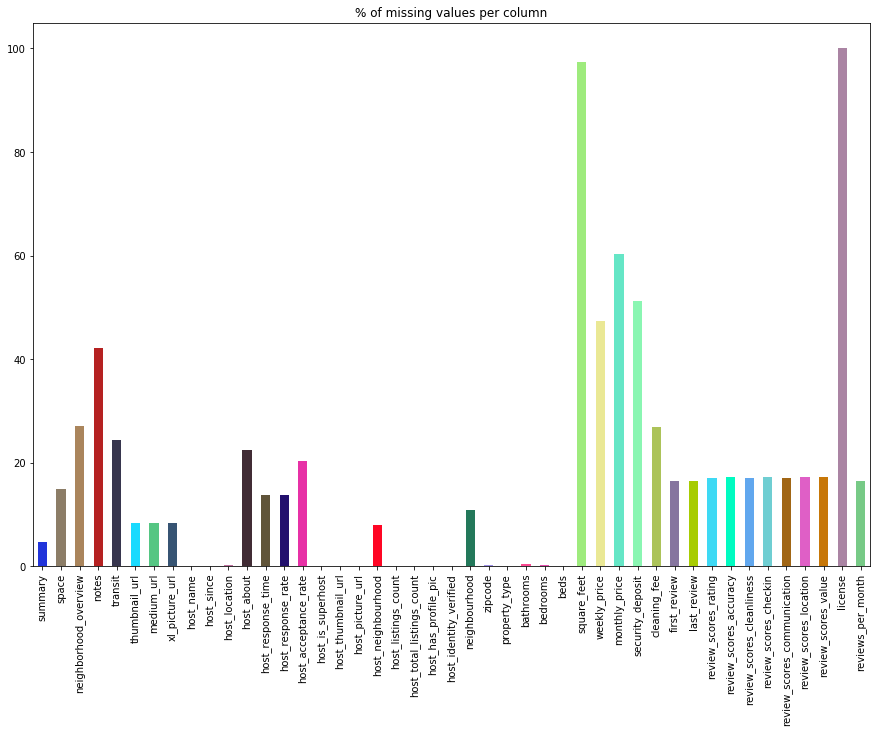

In [9]:
#percentage of missing values in each column
listing_seattle_mp = listing_seattle.isnull().mean()*100

#filter columns with missing values
listing_seattle_mp_with_nan = listing_seattle_mp[listing_seattle_mp>0]

#visualize result
plt.figure(figsize=(15,10))
listing_seattle_mp_with_nan.plot.bar(title='% of missing values per column', color=np.random.rand(len(listing_seattle_mp_with_nan),3))

In [10]:
#reading calendar.csv, and its shape
calendar_seattle = pd.read_csv('calendar_seattle.csv')
print(f"Shape of calendar csv is {calendar_seattle.shape}")

Shape of calendar csv is (1393570, 4)


In [11]:
#looking at the data
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
#number of rows(entries) for each listing_id
print(calendar_seattle['listing_id'].value_counts())

#check if any listing_id had less than 365 days of data
less_365 = sum(list(calendar_seattle['listing_id'].value_counts()<365))
print(f'Number of listings which have less than 365 rows {less_365}')

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
           ... 
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length: 3818, dtype: int64
Number of listings which have less than 365 rows 0


In [13]:
#make sure your number of listings are same in calendar.csv and listings.csv
len(listing_seattle) == len(calendar_seattle)//365

True

In [14]:
#information
rows_num = calendar_seattle.shape[0]
print(f'Number of rows in calendar.csv are {rows_num}')

#find first and last day of the calendar
min_date = calendar_seattle['date'].min()
max_date = calendar_seattle['date'].max()
print(f'First date of observation is {min_date} and the last date is {max_date}')

Number of rows in calendar.csv are 1393570
First date of observation is 2016-01-04 and the last date is 2017-01-02


In [15]:
#number of missing values in each column
calendar_seattle_missing = calendar_seattle.isnull().sum()
max_nan_calendar = list(dict(calendar_seattle_missing.sort_values(ascending=False)).keys())[0]
max_nan_calendar_p = round(max(calendar_seattle.isnull().mean()*100))
print(f'Maximum number of NaNs are present in "{max_nan_calendar}" column, which is about {max_nan_calendar_p}%')

Maximum number of NaNs are present in "price" column, which is about 33%


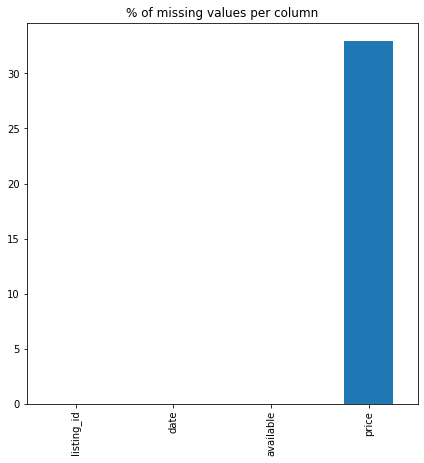

In [16]:
#percentage of missing values in each column
calendar_seattle_mp = calendar_seattle.isnull().mean()*100

#visualize result
plt.figure(figsize=(7,7))
calendar_seattle_mp.plot.bar(title='% of missing values per column')

Thus there are only 33% of NaNs in price column.<br>
That also indicates that, on an average only 33% of the listings were occupied thoughout the year among all 365 days of all listings<br> 

In [17]:
#merging the listing and calendar csv, and cleaning the final dataframe

In [18]:
listing_seattle = listing_seattle.rename(index=str, columns = {'id':'listing_id'})

In [19]:
#now we can merge our datasets based on listing_id
df = pd.merge(calendar_seattle, listing_seattle, on='listing_id')

In [20]:
#analysing all the columns to decide between with all are relevent and which are irrelevent
df.head()

,listing_id,date,available,price_x,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price_y,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,$85.00,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-06,f,NaN,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washin

In [21]:
df.describe()

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,1.393570e+06,1.393570e+06,1.393570e+06,1.392840e+06,1.392840e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.387730e+06,1.391380e+06,1.393205e+06,35405.000000,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.157415e+06,1.153400e+06,1.155225e+06,1.153400e+06,1.155955e+06,1.154495e+06,1.154130e+06,0.0,1.393570e+06,1.164715e+06
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757e+00,7.157757e+00,4.762896e+01,-1.223331e+02,3.349398e+00,1.259469e+00,1.307712e+00,1.735394e+00,854.618557,1.672603e+00,2.369303e+00,7.804476e+02,1.678628e+01,3.681482e+01,5.808250e+01,2.447727e+02,2.222342e+01,9.453926e+01,9.636392e+00,9.556398e+00,9.786709e+00,9.809599e+00,9.608916e+00,9.452245e+00,NaN,2.946307e+00,2.078919e+00
std,2.962274e+06,5.650744e+02,1.458191e+07,2.862441e+01,2.862441e+01,4.304633e-02,3.174036e-02,1.977341e+00,5.902917e-01,8.832794e-01,1.139331e+00,667.944510,1.310868e+00,1.630377e+01,1.683369e+03,1.217205e+01,2.333449e+01,3.405940e+01,1.267560e+02,3.772596e+01,6.605044e+00,6.979210e-01,7.971483e-01,5.954051e-01,5.681220e-01,6.289541e-01,7.501403e-01,NaN,5.892260e+00,1.822063e+00
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000e+00,1.000000e+00,4.750509e+01,-1.224172e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,NaN,1.000000e+00,2.000000e-02
25%,3.258213e+06,2.016010e+13,3.271389e+06,1.000000e+00,1.000000e+00,4.760942e+01,-1.223543e+02,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,420.000000,1.000000e+00,1.000000e+00,6.000000e+01,2.000000e+00,1.300000e+01,2.800000e+01,1.240000e+02,2.000000e+00,9.300000e+01,9.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01,9.000000e+00,9.000000e+00,NaN,1.000000e+00,6.900000e-01
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000e+00,1.000000e+00,4.762360e+01,-1.223289e+02,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,750.000000,1.000000e+00,2.000000e+00,1.125000e+03,2.000000e+01,4.600000e+01,7.300000e+01,3.080000e+02,9.000000e+00,9.600000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,NaN,1.000000e+00,1.540000e+00
75%,8.035212e+06,2.016010e+13,2.590413e+07,3.000000e+00,3.000000e+00,4.766270e+01,-1.223108e+02,4.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1200.000000,2.000000e+00,2.000000e+00,1.125000e+03,3.000000e+01,5.900000e+01,8.900000e+01,3.600000e+02,2.600000e+01,9.900000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,NaN,2.000000e+00,3.000000e+00
max,1.034016e+07,2.016010e+13,5.320861e+07,5.020000e+02,5.020000e+02,4.773336e+01,-1.222406e+02,1.600000e+01,8.000000e+00,7.000000e+00,1.500000e+01,3000.000000,1.500000e+01,1.000000e+03,1.000000e+05,3.000000e+01,6.000000e+01,9.000000e+01,3.650000e+02,4.740000e+02,1.000000e+02,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,NaN,3.700000e+01,1.215000e+01


In [22]:
#irrelevent columns, these are the columns which are not so informative for out analysis
columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']

In [23]:
#drop irrelevent columns
df = df.drop(columns=columns_to_drop)

In [24]:
df.columns

Index(['listing_id', 'date', 'price_x', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count'], dtype='object')

In [25]:
#check dtypes 
df.dtypes

listing_id                            int64
date                                 object
price_x                              object
host_since                           object
host_response_time                   object
host_response_rate                   object
host_is_superhost                    object
host_listings_count                 float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_group_cleansed         object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
guests_included                       int64
extra_people                         object
minimum_nights                  

In [26]:
#convert price to number and drop the price_x column
df['price'] = df['price_x'].str.replace('[$, ]', '').astype(float)
df = df.drop(columns=['price_x'])

In [27]:
df['price'].dtype

dtype('float64')

In [28]:
#converting date from the calendar into month 
df['month'] = df.apply(lambda row: int(row['date'].split('-')[1]),axis=1)

In [29]:
#converting date from the calendar into year and drop the date column
df['year'] = df.apply(lambda row: int(row['date'].split('-')[0]), axis=1)

In [30]:
df = df.drop(columns= ['date'])

In [31]:
#convert host_since date into number and fill in missing values, drop the original column

def get_year_for_host_since(row):
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.NaN
    return host_since

df['host_since_year'] = df.apply(lambda row: get_year_for_host_since(row),axis=1)
df = df.drop(columns = ['host_since'])

In [32]:
df.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price,month,year,host_since_year
0,241032,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2016,2011.0
1,241032,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,85.0,1,2016,2011.0
2,241032,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,2011.0
3,241032,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,2011.0
4,241032,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,$5.00,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,NaN,1,2016,2011.0


In [33]:
df['host_since_year'].isnull().sum()

730

In [34]:
#convert host_response_rate into number and fill in missing values, drop the original column
df['host_response_rate_num'] = df['host_response_rate'].str.replace('%','').astype(float)
df = df.drop(columns = ['host_response_rate'])

In [35]:
df['host_response_rate_num'] = df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean())

In [36]:
#splitting the host_response_rate_num into 5 buckets with new classes for further modeling and to avoid weightage problem
df['host_response_rate_buckets'] = pd.qcut(df['host_response_rate_num'], 5, labels=False, duplicates = 'drop')

In [37]:
df = df.drop(columns = ['host_response_rate_num'])
df['host_response_rate_buckets'].value_counts()

1    924910
0    468660
Name: host_response_rate_buckets, dtype: int64

In [38]:
#fill in missing values for bathrooms, bedrooms and beds with mode as mean wont be a good filling criteria here
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

In [39]:
#dummy variables for 'amenities'
df.amenities[0].replace('"','').replace("'",'').replace('{','').replace('}','').replace('[','').replace(']','').split(',')

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [41]:
df.amenities[1].replace('"','').replace("'",'').replace('{','').replace('}','').replace('[','').replace(']','').split(',')

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [42]:
df.amenities[10].replace('"','').replace("'",'').replace('{','').replace('}','').replace('[','').replace(']','').split(',')

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [46]:
df.amenities[100000].replace('"','').replace("'",'').replace('{','').replace('}','').replace('[','').replace(']','').split(',')

['Kitchen',
 'Gym',
 'Elevator in Building',
 'Hot Tub',
 'Buzzer/Wireless Intercom',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'Essentials',
 'Shampoo',
 '24-Hour Check-in',
 'Hangers']

In [40]:
df.host_listings_count.value_counts()

1.0      795335
2.0      226300
3.0       95265
4.0       55115
5.0       35770
34.0      24455
6.0       17520
48.0      16790
169.0     14235
37.0      13505
36.0      13140
7.0       10950
9.0       10220
10.0       9490
8.0        8395
11.0       8030
21.0       7665
18.0       6935
17.0       5840
12.0       4380
13.0       4380
354.0      3650
163.0      1460
19.0       1460
15.0       1095
84.0        730
502.0       730
Name: host_listings_count, dtype: int64